# Internship


# Anmol Jain  

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

In [21]:
stock=pd.read_csv("stock.csv")
stock.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55
5,9/21/2018,235.00,237.00,227.95,233.75,234.60,5395319.0,12589.59
6,9/19/2018,235.95,237.20,233.45,234.60,234.90,1362058.0,3202.78
7,9/18/2018,237.90,239.25,233.50,235.50,235.05,2614794.0,6163.70
8,9/17/2018,233.15,238.00,230.25,236.40,236.60,3170894.0,7445.41
9,9/14/2018,223.45,236.70,223.30,234.00,233.95,6377909.0,14784.50


In [22]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,234.090000,237.685000,230.500000,234.680000,234.575000,3.508753e+06,8196.033000
std,4.332744,1.355862,3.034432,1.062544,1.121321,1.596596e+06,3693.898327
min,223.450000,235.950000,223.300000,233.500000,233.250000,1.362058e+06,3202.780000
25%,233.362500,236.762500,230.212500,233.850000,233.800000,2.415724e+06,5668.850000
50%,234.300000,237.100000,230.925000,234.300000,234.425000,3.120404e+06,7303.880000
75%,235.712500,238.900000,232.375000,235.375000,235.012500,4.668022e+06,10894.850000
max,240.000000,240.000000,233.500000,236.400000,236.600000,6.377909e+06,14784.500000


In [23]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10 non-null     object 
 1    Open                 10 non-null     float64
 2   High                  10 non-null     float64
 3   Low                   10 non-null     float64
 4   Last                  10 non-null     float64
 5   Close                 10 non-null     float64
 6   Total Trade Quantity  10 non-null     float64
 7   Turnover (Lacs)       10 non-null     float64
dtypes: float64(7), object(1)
memory usage: 896.0+ bytes


In [24]:
stock.columns

Index(['Date', ' Open', 'High', 'Low', 'Last ', 'Close',
       'Total Trade Quantity', 'Turnover (Lacs)'],
      dtype='object')

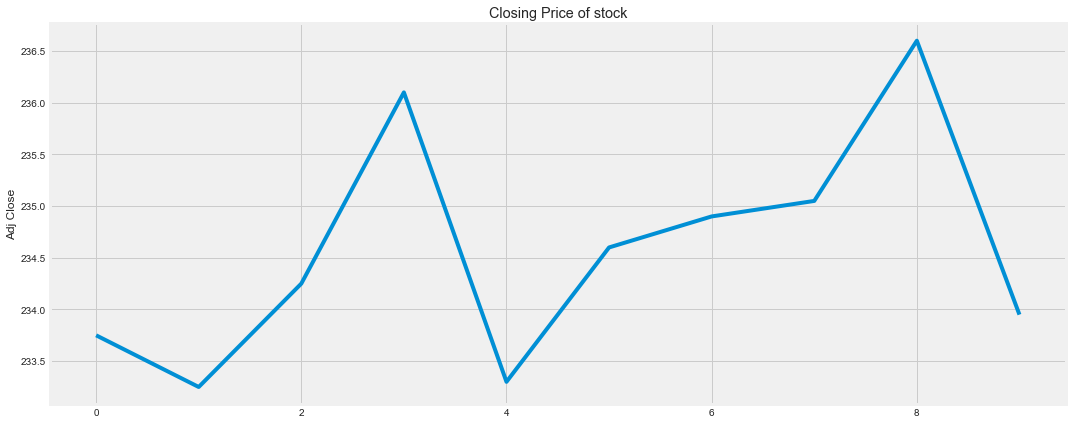

In [25]:
plt.figure(figsize=(15,6))
stock['Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of stock")

plt.tight_layout()

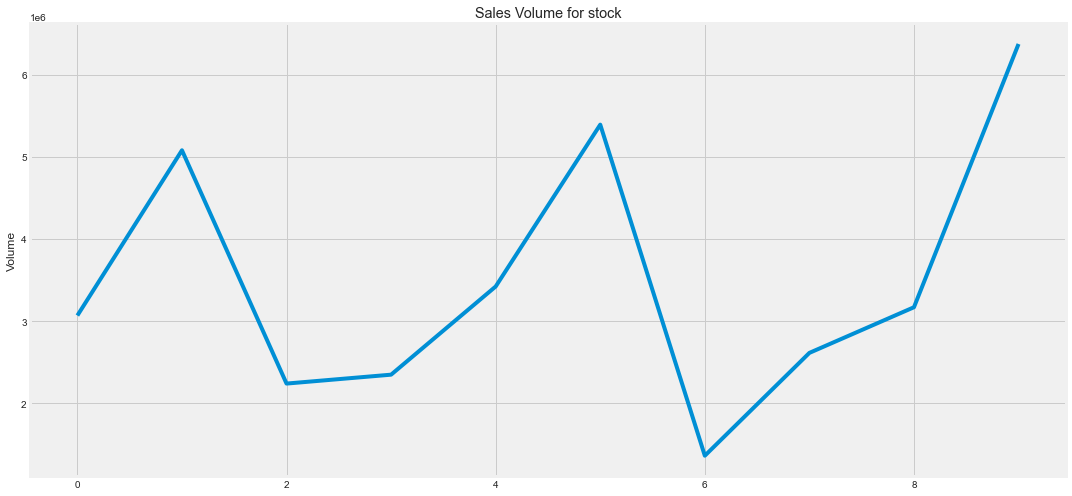

In [26]:
plt.figure(figsize=(15, 7))

stock['Total Trade Quantity'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for stock")
    
plt.tight_layout()

In [27]:
stock['Daily Return'] = stock['Close'].pct_change()

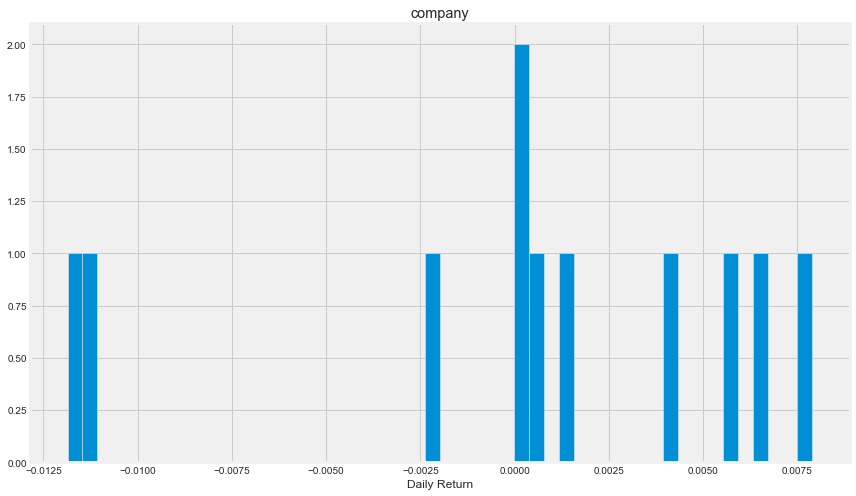

In [28]:
plt.figure(figsize=(12, 7))

stock['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.title(f'company')
    
plt.tight_layout()

<AxesSubplot:>

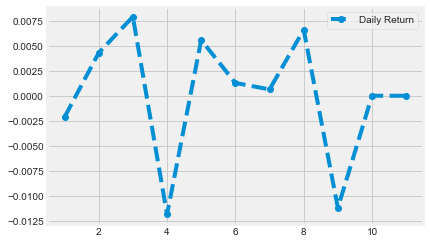

In [29]:
stock['Daily Return'].plot(legend=True, linestyle='--', marker='o')

In [30]:
closing_df = stock['Close']
closing_df.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [31]:
tech_rets = closing_df.pct_change()
tech_rets.head()

0         NaN
1   -0.002139
2    0.004287
3    0.007898
4   -0.011859
Name: Close, dtype: float64

In [32]:
tech_rets.to_frame()

,Close
0,NaN
1,-0.002139
2,0.004287
3,0.007898
4,-0.011859
5,0.005572
6,0.001279
7,0.000639
8,0.006594
9,-0.011200


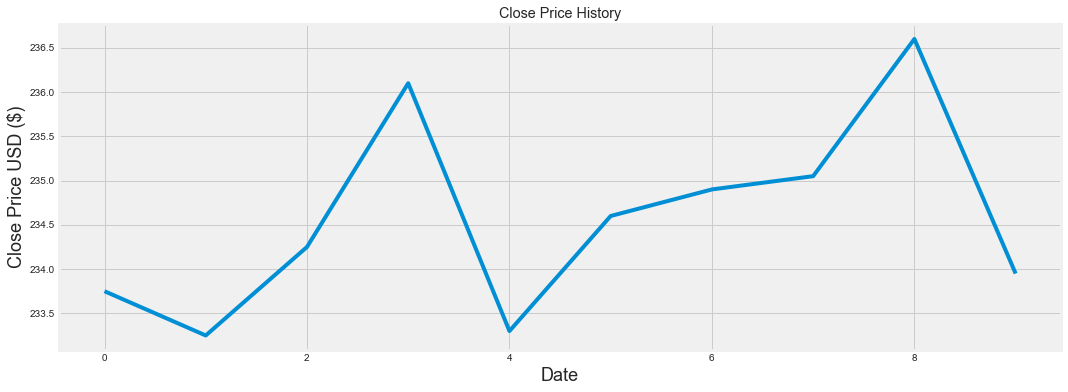

In [33]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
data = stock.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

12

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14925373],
       [0.        ],
       [0.29850746],
       [0.85074627],
       [0.01492537],
       [0.40298507],
       [0.49253731],
       [0.53731343],
       [1.        ],
       [0.20895522],
       [       nan],
       [       nan]])

In [36]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(9, len(train_data)):
    x_train.append(train_data[i-9:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 9:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.14925373, 0.        , 0.29850746, 0.85074627, 0.01492537,
       0.40298507, 0.49253731, 0.53731343, 1.        ])]
[0.20895522388059362]



In [37]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3/3 [==============================] - 5s 16ms/step - loss: nan


In [38]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(9, len(test_data)):
    x_test.append(test_data[i-9:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

ValueError: operands could not be broadcast together with shapes (3,1) (0,1) 

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Exception: Data must be 1-dimensional

In [40]:
valid

,Close
